In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


In [2]:

def create_data_model(waypoints):
    data = {}
    data['distance_matrix'] = compute_distance_matrix(waypoints)
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

def compute_distance_matrix(waypoints):
    n = len(waypoints)
    distance_matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            dx = waypoints[i][0] - waypoints[j][0]
            dy = waypoints[i][1] - waypoints[j][1]
            distance = int((dx**2 + dy**2)**0.5)
            row.append(distance)
        distance_matrix.append(row)
    return distance_matrix

def draw_circle(ax, center, radius):
    circle = plt.Circle(center, radius, color='b', fill=False)
    ax.add_artist(circle)
    
def print_solution(manager, routing, solution):
    print('TSP Distance: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    return plan_output



In [3]:
def plot_solution(waypoints, plan_output, radius):
    ordered_points = [waypoints[int(node)] for node in plan_output.split() if node.isdigit()]
    ordered_points.append(ordered_points[0])  # To complete the loop
    xs, ys = zip(*ordered_points)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(xs, ys)
    ax.plot(xs, ys, linestyle='-', marker='o')
    for i, point in enumerate(ordered_points[:-1]):
        plt.annotate(i, (point[0] + 0.5, point[1] + 0.5))
        if i > 0:  # Skip the starting point
            draw_circle(ax, point, radius)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Solution')
    plt.grid()
    plt.axis('equal')
    plt.show()

In [4]:


def main(waypoints,radius):
    
    data = create_data_model(waypoints)

    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    solution = routing.SolveWithParameters(search_parameters)

    if solution:
        print("Solution finded")
        plan_output = print_solution(manager, routing, solution)
        plot_solution(waypoints, plan_output, radius)



In [5]:
def angle_between_points(p1, p2):
    return np.arctan2(p2[1] - p1[1], p2[0] - p1[0])
import numpy as np

def angle_between_points(p1, p2):
    return np.arctan2(p2[1] - p1[1], p2[0] - p1[0])

def point_on_circle(center, angle, radius):
    x = center[0] + radius * np.cos(angle)
    y = center[1] + radius * np.sin(angle)
    return (x, y)

def plot_solution(waypoints, plan_output, radius):
    ordered_points = [waypoints[int(node)] for node in plan_output.split() if node.isdigit()]
    ordered_points.append(ordered_points[0])

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(*zip(*ordered_points))

    for i, point in enumerate(ordered_points[:-1]):
        plt.annotate(i, (point[0] + 0.5, point[1] + 0.5))
        if i > 0:
            draw_circle(ax, point, radius)

    new_path = []
    for i in range(len(ordered_points) - 1):
        if i == 0:
            new_path.append(ordered_points[i])
        else:
            angle = angle_between_points(ordered_points[i], ordered_points[i + 1])
            chord_start = point_on_circle(ordered_points[i], angle - np.pi / 2, radius)
            new_path.append(chord_start)

        if i == len(ordered_points) - 2:
            new_path.append(ordered_points[i + 1])
        else:
            angle = angle_between_points(ordered_points[i + 1], ordered_points[i])
            chord_end = point_on_circle(ordered_points[i + 1], angle + np.pi / 2, radius)
            new_path.append(chord_end)

    ax.plot(*zip(*new_path), linestyle='-', marker='o')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Solution')
    plt.grid()
    plt.axis('equal')
    plt.show()

def get_new_total_distance(ordered_points, radius):
    new_total_distance = 0
    for i in range(len(ordered_points) - 1):
        if i == 0:
            new_total_distance += np.sqrt((ordered_points[i][0] - ordered_points[i + 1][0])**2 + (ordered_points[i][1] - ordered_points[i + 1][1])**2)
        else:
            angle = angle_between_points(ordered_points[i], ordered_points[i + 1])
            chord_start = point_on_circle(ordered_points[i], angle - np.pi / 2, radius)
            chord_end = point_on_circle(ordered_points[i + 1], angle + np.pi / 2, radius)
            chord_length = np.sqrt((chord_start[0] - chord_end[0])**2 + (chord_start[1] - chord_end[1])**2)
            new_total_distance += chord_length
    return new_total_distance


In [6]:
def plot_solution(waypoints, plan_output, radius):
    ordered_points = [waypoints[int(node)] for node in plan_output.split() if node.isdigit()]
    ordered_points.append(ordered_points[0])

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(*zip(*ordered_points))

    for i, point in enumerate(ordered_points[:-1]):
        plt.annotate(i, (point[0] + 0.5, point[1] + 0.5))
        if i > 0:
            draw_circle(ax, point, radius)

    new_path = []
    for i in range(len(ordered_points) - 1):
        angle = angle_between_points(ordered_points[i], ordered_points[i + 1])
        chord_start = point_on_circle(ordered_points[i], angle - np.pi / 2, radius)
        chord_end = point_on_circle(ordered_points[i + 1], angle + np.pi / 2, radius)

        if i == 0:
            new_path.append(ordered_points[i])
            new_path.append(chord_start)
        else:
            prev_angle = angle_between_points(ordered_points[i - 1], ordered_points[i])
            prev_chord_end = point_on_circle(ordered_points[i], prev_angle + np.pi / 2, radius)
            if np.linalg.norm(np.array(chord_start) - np.array(prev_chord_end)) < np.linalg.norm(np.array(chord_end) - np.array(prev_chord_end)):
                new_path.append(chord_start)
                new_path.append(chord_end)
            else:
                new_path.append(chord_end)
                new_path.append(chord_start)

        if i == len(ordered_points) - 2:
            new_path.append(ordered_points[i + 1])

    ax.plot(*zip(*new_path), linestyle='-', marker='o')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Solution')
    plt.grid()
    plt.axis('equal')
    plt.show()


In [7]:
def plot_solution(waypoints, plan_output, radius):
    ordered_points = [waypoints[int(node)] for node in plan_output.split() if node.isdigit()]
    ordered_points.append(ordered_points[0])

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(*zip(*ordered_points))

    for i, point in enumerate(ordered_points[:-1]):
        plt.annotate(i, (point[0] + 0.5, point[1] + 0.5))
        if i > 0 and i < len(ordered_points) - 2:  # Exclude start and end points from circles
            draw_circle(ax, point, radius)

    new_path = [ordered_points[0]]
    for i in range(1, len(ordered_points) - 2):
        
        # calculate angle and chords for the current waypoint
        angle = angle_between_points(ordered_points[i-1], ordered_points[i])
        nextangle= angle_between_points(ordered_points[i], ordered_points[i+1])
        chord_start = point_on_circle(ordered_points[i], angle - np.pi , radius)
        chord_end = point_on_circle(ordered_points[i], nextangle , radius)
        # print("ordered_points-1,ordered_points")
        # print(ordered_points[i-1], ordered_points[i])
        # print("chord_start,chord_end")
        # print(chord_start,chord_end)
        # print("chord_start,chord_end")

        # calculate the chord for the previous waypoint
        prev_angle = angle_between_points(ordered_points[i - 2] if i > 1 else ordered_points[0], ordered_points[i-1])
        prev_chord_end = point_on_circle(ordered_points[i-1], prev_angle + np.pi / 2, radius)

        # add the point on the current waypoint's circle that is closest to the previous waypoint
        if np.linalg.norm(np.array(chord_start) - np.array(prev_chord_end)) < np.linalg.norm(np.array(chord_end) - np.array(prev_chord_end)):
            new_path.extend([chord_start, chord_end])
        else:
            new_path.extend([chord_end, chord_start])

# add the ending point
    new_path.append(ordered_points[-1])


    ax.plot(*zip(*new_path), linestyle='-', marker='o')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Solution')
    plt.grid()
    plt.axis('equal')
    plt.show()


In [24]:
def plot_solution(waypoints, plan_output, radius):
    ordered_points = [waypoints[int(node)] for node in plan_output.split() if node.isdigit()]
    ordered_points.append(ordered_points[0])

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(*zip(*ordered_points))

    for i, point in enumerate(ordered_points[:-1]):
        plt.annotate(i, (point[0] + 0.5, point[1] + 0.5))
        if i > 0 and i < len(ordered_points) - 2:  # Exclude start and end points from circles
            draw_circle(ax, point, radius)

    new_path = [ordered_points[0]]
    for i in range(1, len(ordered_points) - 2):
        # calculate angle and chords for the current waypoint
        angle = angle_between_points(ordered_points[i-1], ordered_points[i])
        nextangle = angle_between_points(ordered_points[i], ordered_points[i+1])
        chord_start = point_on_circle(ordered_points[i], angle - np.pi , radius)
        chord_end = point_on_circle(ordered_points[i], nextangle , radius)

        # calculate the chord for the previous waypoint
        prev_angle = angle_between_points(ordered_points[i - 2] if i > 1 else ordered_points[0], ordered_points[i-1])
        prev_chord_end = point_on_circle(ordered_points[i-1], prev_angle + np.pi / 2, radius)
        # ax.plot(*zip(*[chord_start, chord_end]), 'r-') 
        # add the point on the current waypoint's circle that is closest to the previous waypoint
        if np.linalg.norm(np.array(chord_start) - np.array(prev_chord_end)) < np.linalg.norm(np.array(chord_end) - np.array(prev_chord_end)):
            new_path.extend([chord_start, chord_end])
            ax.plot(*zip(*[chord_start, chord_end]), 'r-')  # visualize the chord
        else:
            new_path.extend([chord_end, chord_start])
            ax.plot(*zip(*[chord_end, chord_start]), 'r-')  # visualize the chord
        # ax.plot(*zip(*[chord_end, ordered_points[i]], 'r-'))
        # ax.plot(*zip(*[ordered_points[i], chord_end], 'r-'))
    # add the ending point
    new_path.append(ordered_points[-1])
    
    ax.plot(*zip(*new_path), linestyle='-', marker='o',label="AGV's path")

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Solution')
    plt.grid()
    plt.axis('equal')
    plt.show()


In [51]:
import matplotlib.patches as patches

def plot_solution(waypoints, plan_output, radius):
    ordered_points = [waypoints[int(node)] for node in plan_output.split() if node.isdigit()]
    ordered_points.append(ordered_points[0])

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(*zip(*ordered_points))


    flag = 0 
    new_path = [ordered_points[0]]
    for i in range(1, len(ordered_points) - 2):
        if i > 0 and i < len(ordered_points) - 2:
            center = ordered_points[i]
        # calculate angle and chords for the current waypoint
        angle = angle_between_points(ordered_points[i-1], ordered_points[i])
        nextangle = angle_between_points(ordered_points[i], ordered_points[i+1])
        chord_start = point_on_circle(ordered_points[i], angle - np.pi , radius)
        chord_end = point_on_circle(ordered_points[i], nextangle , radius)

        # calculate the chord for the previous waypoint
        prev_angle = angle_between_points(ordered_points[i - 2] if i > 1 else ordered_points[0], ordered_points[i-1])
        prev_chord_end = point_on_circle(ordered_points[i-1], prev_angle + np.pi / 2, radius)
        if flag ==0:
            ax.plot(*zip(*[chord_start, center]), 'r-',label="AUV's path")
            flag =1
        ax.plot(*zip(*[chord_start, center]), 'r-')
        ax.plot(*zip(*[chord_end, center]), 'r-')

     
        # add the point on the current waypoint's circle that is closest to the previous waypoint
        if np.linalg.norm(np.array(chord_start) - np.array(prev_chord_end)) < np.linalg.norm(np.array(chord_end) - np.array(prev_chord_end)):
            new_path.extend([chord_start, chord_end])
            # ax.plot(*zip(*[chord_start, chord_end]), 'r-')  # visualize the chord
        else:
            new_path.extend([chord_end, chord_start])
            # ax.plot(*zip(*[chord_end, chord_start]), 'r-')  # visualize the chord

        # Add lines from point to the center of the circle
    for i, point in enumerate(ordered_points[:-1]):
        plt.annotate(i, (point[0] + 0.5, point[1] + 0.5))
        if i > 0 and i < len(ordered_points) - 2:  # Exclude start and end points from circles
            draw_circle(ax, point, radius)
            
    # add the ending point
    new_path.append(ordered_points[-1])

    ax.plot(*zip(*new_path), linestyle='-', marker='o', color='blue', label="AGV's path")

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Solution')
    plt.grid()
    plt.axis('equal')
    plt.legend()
    plt.show()


In [49]:
import matplotlib.patches as patches

def plot_solution(waypoints, plan_output, radius):
    ordered_points = [waypoints[int(node)] for node in plan_output.split() if node.isdigit()]
    ordered_points.append(ordered_points[0])

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(*zip(*ordered_points))

    new_path = [ordered_points[0]]
    auv_legend_added = False  # Flag for AUV's path legend entry

    for i in range(1, len(ordered_points) - 2):
        if i > 0 and i < len(ordered_points) - 2:
            center = ordered_points[i]
            draw_circle(ax, point, radius)

        # Calculate angle and chords for the current waypoint
        angle = angle_between_points(ordered_points[i-1], ordered_points[i])
        nextangle = angle_between_points(ordered_points[i], ordered_points[i+1])
        chord_start = point_on_circle(ordered_points[i], angle - np.pi , radius)
        chord_end = point_on_circle(ordered_points[i], nextangle , radius)

        # Calculate the chord for the previous waypoint
        prev_angle = angle_between_points(ordered_points[i - 2] if i > 1 else ordered_points[0], ordered_points[i-1])
        prev_chord_end = point_on_circle(ordered_points[i-1], prev_angle + np.pi / 2, radius)

        # Add lines from point to the center of the circle
        if auv_legend_added:
            ax.plot(*zip(*[chord_start, center]), 'r-')
            ax.plot(*zip(*[chord_end, center]), 'r-')
        else:
            ax.plot(*zip(*[chord_start, center]), 'r-', label="AUV's path")
            ax.plot(*zip(*[chord_end, center]), 'r-')
            auv_legend_added = True  # Set flag to True after adding label for the first time

        # Add the point on the current waypoint's circle that is closest to the previous waypoint
        if np.linalg.norm(np.array(chord_start) - np.array(prev_chord_end)) < np.linalg.norm(np.array(chord_end) - np.array(prev_chord_end)):
            new_path.extend([chord_start, chord_end])
        else:
            new_path.extend([chord_end, chord_start])

    # add the ending point
    
    for i, point in enumerate(ordered_points[:-1]):
        plt.annotate(i, (point[0] + 0.5, point[1] + 0.5))
        if i > 0 and i < len(ordered_points) - 2:  # Exclude start and end points from circles
            draw_circle(ax, point, radius)
    ax.plot(*zip(*new_path), linestyle='-', marker='o', color='blue', label="AGV's path")
    new_path.append(ordered_points[-1])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Solution')
    plt.grid()
    plt.axis('equal')
    plt.legend()
    plt.show()


In [46]:
def get_new_total_distance(ordered_points, radius):
    new_total_distance = 0
    print("run-1")
    for i in range(1, len(ordered_points) - 2):
        # calculate angle and chords for the current waypoint
        angle = angle_between_points(ordered_points[i-1], ordered_points[i])
        nextangle = angle_between_points(ordered_points[i], ordered_points[i+1])
        chord_start = point_on_circle(ordered_points[i], angle - np.pi, radius)
        chord_end = point_on_circle(ordered_points[i], nextangle, radius)

        # calculate the chord for the previous waypoint
        prev_angle = angle_between_points(ordered_points[i - 2] if i > 1 else ordered_points[0], ordered_points[i-1])
        prev_chord_end = point_on_circle(ordered_points[i-1], prev_angle + np.pi / 2, radius)
        print("run0")
        # add the distance from the previous waypoint to the point on the current waypoint's circle
        if np.linalg.norm(np.array(chord_start) - np.array(prev_chord_end)) < np.linalg.norm(np.array(chord_end) - np.array(prev_chord_end)):
            new_total_distance += np.linalg.norm(np.array(prev_chord_end) - np.array(chord_start))
            print("run1")
            print("np.linalg.norm(np.array(prev_chord_end) - np.array(chord_start))",np.linalg.norm(np.array(prev_chord_end) - np.array(chord_start)))
            new_total_distance += np.linalg.norm(np.array(chord_start) - np.array(chord_end))
            new_total_distance += np.linalg.norm(np.array(chord_end) - np.array(ordered_points[i+1]))
        else:
            new_total_distance += np.linalg.norm(np.array(prev_chord_end) - np.array(chord_end))
            print("run2")
            print("np.array(prev_chord_end) - np.array(chord_end)",np.linalg.norm(np.array(prev_chord_end) - np.array(chord_end)))
            new_total_distance += np.linalg.norm(np.array(chord_end) - np.array(chord_start))
            new_total_distance += np.linalg.norm(np.array(chord_start) - np.array(ordered_points[i+1]))

    # Add distances from starting point to first chord and from last chord to starting point
    first_angle = angle_between_points(ordered_points[0], ordered_points[1])
    first_chord_end = point_on_circle(ordered_points[1], first_angle + np.pi / 2, radius)
    new_total_distance += np.linalg.norm(np.array(ordered_points[0]) - np.array(first_chord_end))

    last_angle = angle_between_points(ordered_points[-3], ordered_points[-2])
    last_chord_start = point_on_circle(ordered_points[-3], last_angle - np.pi / 2, radius)
    new_total_distance += np.linalg.norm(np.array(last_chord_start) - np.array(ordered_points[-1]))

    return new_total_distance


In [1]:
def main(waypoints):
    data = create_data_model(waypoints)
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]
    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        plan_output = print_solution(manager, routing, solution)
        plot_solution(waypoints, plan_output, radius)
        return plan_output
    return None
if __name__ == '__main__':
    #waypoints = [(random.randint(0, 50), random.randint(0, 50)) for _ in range(8)]
    waypoints = [(20,10),(10,10),(30,10),(20,20)]
    radius = 3
    plan_output = main(waypoints)
    if plan_output:
        # plot_solution(waypoints, plan_output, radius)
        new_total_distance = get_new_total_distance(waypoints, radius)
        print(f"New total distance: {new_total_distance:.2f}")

NameError: name 'create_data_model' is not defined

TSP Distance: 110 miles
Route for vehicle 0:
 0 -> 3 -> 1 -> 2 -> 0



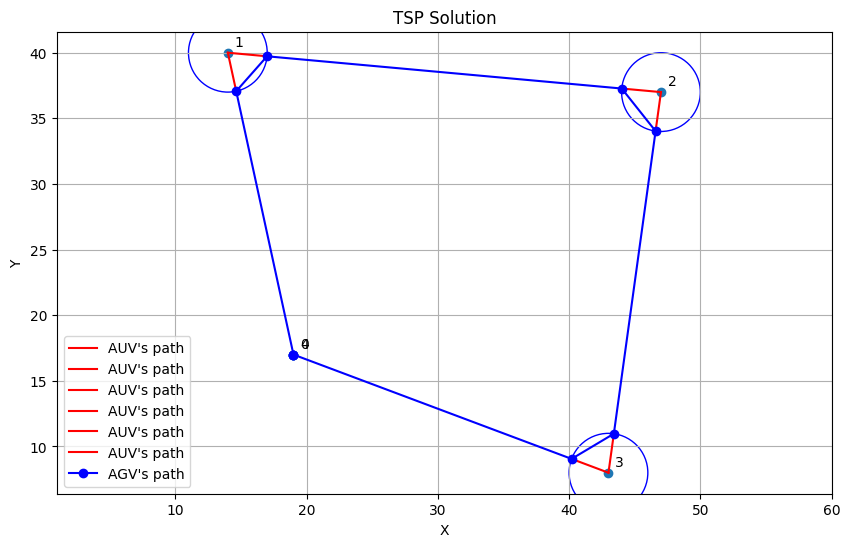

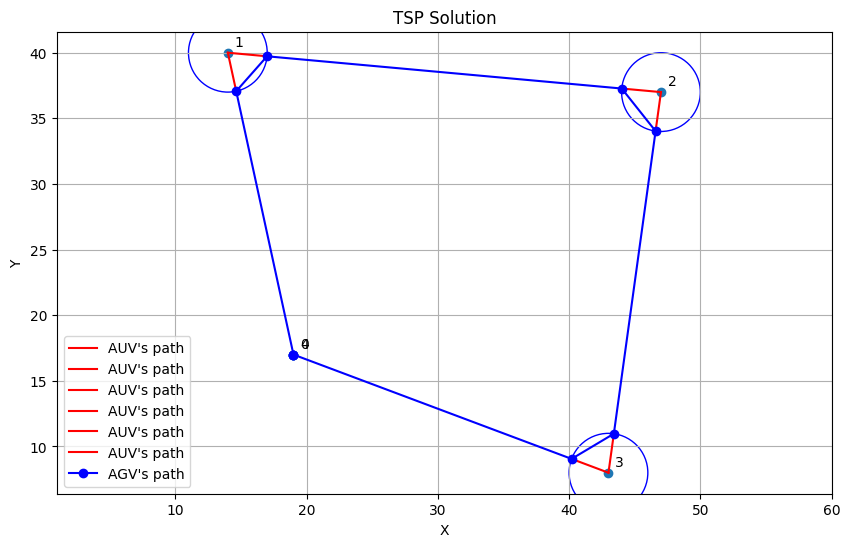

run-1
run0
run1
np.linalg.norm(np.array(prev_chord_end) - np.array(chord_start)) 29.765861000110856
New total distance: 123.09


In [37]:
def main(waypoints):
    data = create_data_model(waypoints)
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]
    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        plan_output = print_solution(manager, routing, solution)
        plot_solution(waypoints, plan_output, radius)
        return plan_output
    return None
if __name__ == '__main__':
    waypoints = [(random.randint(0, 50), random.randint(0, 50)) for _ in range(4)]
    radius = 3
    plan_output = main(waypoints)
    if plan_output:
        plot_solution(waypoints, plan_output, radius)
        new_total_distance = get_new_total_distance(waypoints, radius)
        print(f"New total distance: {new_total_distance:.2f}")